In [45]:
import skimage.io as skio
import matplotlib.pyplot as plt
import numpy as np
import skimage
from matplotlib import colormaps
from skimage.morphology import disk 
from ipywidgets import interact, widgets
import matplotlib.patches as patches


In [46]:
def median(img,mask,size = 8):
    return skimage.filters.rank.median(img,footprint = disk(size), mask = mask)
def blur(img,scale):
    return skimage.filters.gaussian(img,sigma = scale)
def expand(img,scale):
    blurred = (10*blur(img,scale)) > 0.5
    expanded = ((blurred + img)) > 0
    return blur(expanded,scale/ 1.5)
def overlay(img,img2,mask):
    img = img*mask
    img2 = img2 * (1-mask)
    return img + img2
    
    

In [47]:
img = skio.imread("1_altered.jpg")
if img.ndim == 3:
    img = skimage.color.rgb2gray(img)

In [48]:
img = ((img/img.max())*255).astype(np.uint8)

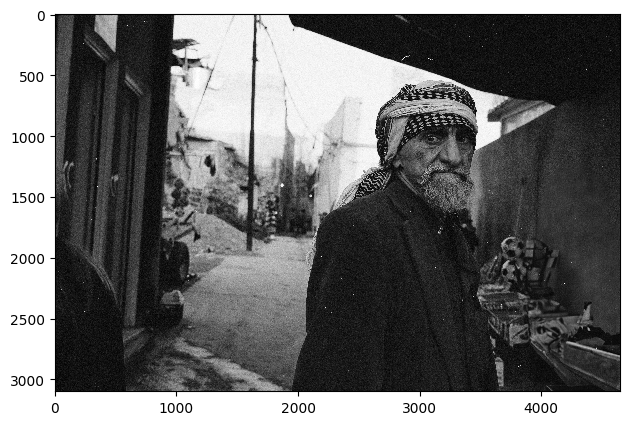

In [49]:
skio.imshow(img)

In [50]:
def remove_dust(img,intensity=6,sig_min = 2, sig_max = 4, threshold = 120, scale = 3):
    dog = abs(skimage.filters.difference_of_gaussians(img,sig_min,sig_max))>0.05
    td = img > threshold
    combined = np.logical_and(td,dog)
    combined = expand(combined,scale)
    img2 = median(img,size = intensity, mask = combined > 0)
    return overlay(img2,img,combined).astype(np.uint8)

In [51]:
def preview(img,height,width, size = 128):
    img_height, img_width = img.shape
    
    img_height -= size
    img_width -= size
    
    img_height = round(height*img_height)
    img_width = round(width*img_width)
    
    
    
    return img[img_height:img_height+size,img_width:img_width+size]
    
    
    

In [53]:
def compare(img, h, w, intensity=6, sig_min=2, sig_max=4, threshold=120, size=128):
    y = preview(img, h, w, size=size)
    x = remove_dust(y, intensity=intensity, threshold=threshold, sig_min=sig_min, sig_max=sig_max)
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    rect = patches.Rectangle((w * (img.shape[1]-size), h * (img.shape[0]-size)), size, size, linewidth=1, edgecolor='r', facecolor='none')
    
    axes[0].imshow(y, cmap="gray", vmin=0, vmax=255)
    axes[1].imshow(preview(x, h, w, size=size), cmap="gray", vmin=0, vmax=255)
    axes[2].imshow(img, cmap="gray")
    
    axes[2].add_patch(rect)
    
    plt.show()

# Function to save the processed image
def save_image(event):
    h = height_slider.value
    w = width_slider.value
    intensity = intensity_slider.value
    sig_min = sig_min_slider.value
    sig_max = sig_max_slider.value
    threshold = threshold_slider.value
    size = size_slider.value
    
    # Apply preview and remove_dust with current slider values
    y = img
    processed_img = remove_dust(y, intensity=intensity, threshold=threshold, sig_min=sig_min, sig_max=sig_max)
    
    # Save the processed image
    skio.imsave("cache.jpg", processed_img)
    print("Image saved.")

# Creating interactive sliders for all parameters
height_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Height')
width_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Width')
intensity_slider = widgets.IntSlider(min=1, max=16, step=1, value=6, description='Intensity')
sig_min_slider = widgets.FloatSlider(min=0, max=10, step=0.1, value=2, description='Sigma Min')
sig_max_slider = widgets.FloatSlider(min=0, max=10, step=0.1, value=4, description='Sigma Max')
threshold_slider = widgets.IntSlider(min=0, max=255, step=1, value=120, description='Threshold')
size_slider = widgets.IntSlider(min=1, max=256, step=1, value=128, description='Size')

interact(compare, 
         img=widgets.fixed(img),
         h=height_slider,
         w=width_slider,
         intensity=intensity_slider,
         sig_min=sig_min_slider,
         sig_max=sig_max_slider,
         threshold=threshold_slider,
         size=size_slider)

# Creating save button
save_button = widgets.Button(description="Save Image")
save_button.on_click(save_image)

# Displaying the sliders and button
display(save_button)

interactive(children=(FloatSlider(value=0.5, description='Height', max=1.0, step=0.01), FloatSlider(value=0.5,…

Button(description='Save Image', style=ButtonStyle())